Analiza Poletnih olimpijskih iger 2024 v Parizu

V tem dokumentu je analiza uspeha posameznih držav na olimpijskih igrah, kjer so podatki vzeti iz spletne strani [olympics](https://olympics.com/en/paris-2024/medals/medallists). Predvsem me je zanimalo, katera država se je na olimpijskih igrah najbolj izkazala in kako dobro je šlo Sloveniji ter ali smo 'pred Hrvati'. Tako je v vsakem grafu zajetih 10 najboljših držav, Slovenija in Hrvaška. Narejena je s pomočjo knjižnic json, requests, pypopulation, pycountry_convert in bs4.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pridobitev_podatkov import atleti
from funkcije import atleti, weightane_vrednosti_evetov, slovar_disciplin_podeljenih_medalj, število_vseh_medalj, stevilo_medalj_drzave, skupno_število_medalj
from funkcije import število_točk_z_utežmi, sortiran_slovar_kontinentov, skupno_število_medalj_vsakemu_svojo, št_prebivalcev_z_medaljo, število_atletov_po_vrsti, število_atletov_iz_vsake_države
from funkcije import koliko_prebivalcev_na_atleta, prebivalcev_na_medaljo, procent_atletov_z_medaljo

Najprej je treba pogledati, koliko disciplin je v vsakem športu, da jih lahko primerno utežimo za nadaljnje analiziranje. Graf predstavlja delež medalj vsakega športa glede na vse medalje (teh je 329), kar je ravno obratna vrednost njihovih uteži. 

{'Swimming': 35, 'Artistic Gymnastics': 14, 'Archery': 5, 'Cycling Track': 12, 'Canoe Sprint': 10, 'Athletics': 48, 'Table Tennis': 5, 'Canoe Slalom': 6, 'Cycling Road': 4, 'Diving': 8, 'Shooting': 15, 'Artistic Swimming': 2, 'Judo': 15, 'Equestrian': 6, 'Fencing': 12, 'Rowing': 14, 'Triathlon': 3, 'Trampoline Gymnastics': 2, 'Boxing': 13, 'Cycling BMX Freestyle': 2, 'Tennis': 5, 'Skateboarding': 4, 'Cycling BMX Racing': 2, 'Sailing': 10, 'Beach Volleyball': 2, 'Wrestling': 18, 'Weightlifting': 10, 'Breaking': 2, 'Badminton': 5, 'Rhythmic Gymnastics': 2, 'Handball': 2, 'Modern Pentathlon': 2, 'Football': 2, 'Water Polo': 2, 'Rugby Sevens': 2, 'Volleyball': 2, 'Cycling Mountain Bike': 2, 'Taekwondo': 8, 'Surfing': 2, 'Sport Climbing': 4, '3x3 Basketball': 2, 'Marathon Swimming': 2, 'Hockey': 2, 'Golf': 2, 'Basketball': 2}
{'Swimming': 9.4, 'Artistic Gymnastics': 23.5, 'Archery': 65.8, 'Cycling Track': 27.416666666666668, 'Canoe Sprint': 32.9, 'Athletics': 6.854166666666667, 'Table Tenni

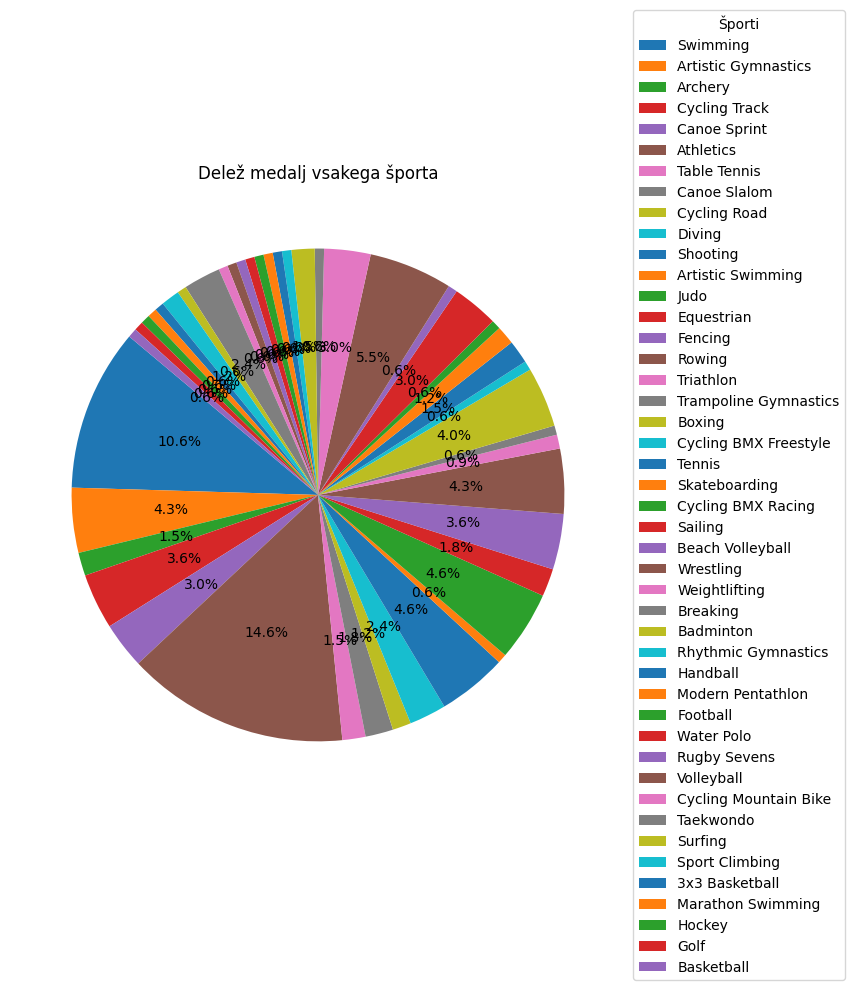

In [50]:
print(slovar_disciplin_podeljenih_medalj)
print(weightane_vrednosti_evetov)

labels = list(slovar_disciplin_podeljenih_medalj.keys())
sizes = list(slovar_disciplin_podeljenih_medalj.values())

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)
ax.legend(wedges, labels, title="Športi", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Delež medalj vsakega športa')
plt.show()


Spodaj pa je graf, ki prikazuje 10 najbolj uspešnih držav po številu medalj ter Hrvaško in Slovenijo.

{'USA': [40, 44, 42], 'CHN': [40, 27, 24], 'GBR': [14, 22, 29], 'FRA': [16, 26, 22], 'AUS': [18, 19, 16], 'JPN': [20, 12, 13], 'ITA': [12, 13, 15], 'NLD': [15, 7, 12], 'DEU': [12, 13, 8], 'KOR': [13, 9, 10], 'HRV': [2, 2, 3], 'SVN': [2, 1, 0]}


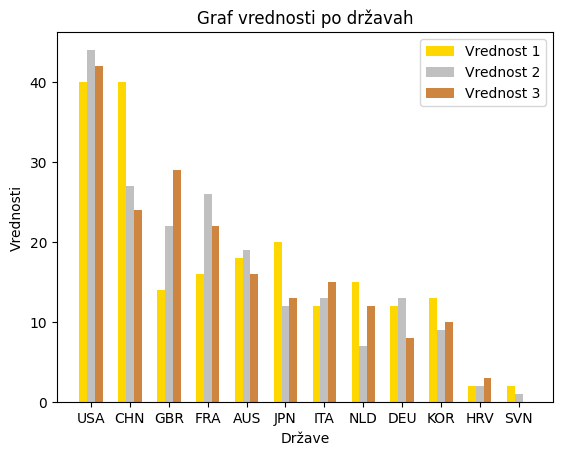

In [51]:
št_medalj = stevilo_medalj_drzave(atleti)
št_medalj_novi_slovar = dict(list(št_medalj.items())[:10])
št_medalj_novi_slovar['HRV'] = št_medalj.get('HRV')
št_medalj_novi_slovar['SVN'] = št_medalj.get('SVN')
print(št_medalj_novi_slovar)

drzave = list(št_medalj_novi_slovar.keys())
vrednosti = np.array(list(št_medalj_novi_slovar.values()))
n_drzave = len(drzave)
n_vrednosti = vrednosti.shape[1]
x = np.arange(n_drzave)
width = 0.2
barve = ['gold', 'silver', 'peru']
fig, ax = plt.subplots()
for i in range(n_vrednosti):
    ax.bar(x + i * width, vrednosti[:, i], width, label=f'Vrednost {i + 1}', color = barve[i])
ax.set_xlabel('Države')
ax.set_ylabel('Vrednosti')
ax.set_title('Graf vrednosti po državah')
ax.set_xticks(x + width)
ax.set_xticklabels(drzave)

# Dodajanje legende
ax.legend()

# Prikaz grafa
plt.show()



Kaj pa, če seštejemo število medalj?

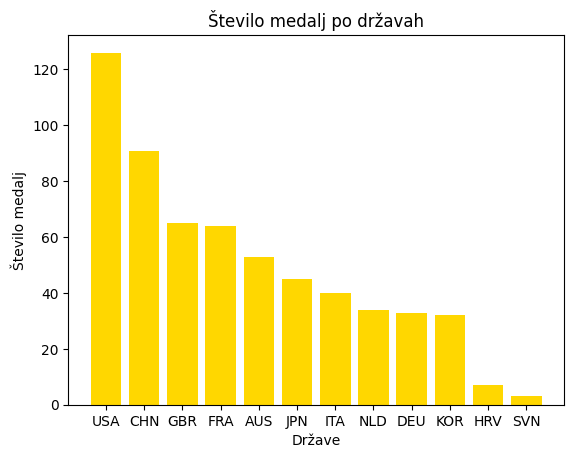

In [52]:
alfa = stevilo_medalj_drzave(atleti)
za_graf = skupno_število_medalj(alfa)
skupno_število_medalj_novi_slovar = dict(list(za_graf.items())[:10])
skupno_število_medalj_novi_slovar['HRV'] = za_graf.get('HRV')
skupno_število_medalj_novi_slovar['SVN'] = za_graf.get('SVN')

države = list(skupno_število_medalj_novi_slovar.keys())
vrednosti = list(skupno_število_medalj_novi_slovar.values())
plt.bar(države, vrednosti, color='gold')
plt.ylabel('Število medalj')
plt.xlabel('Države')
plt.title('Število medalj po državah')
plt.show()




Štetje števila medalj pa je seveda malo nesmiselno, saj sta Pakistan z eno zlato in Zelenortski otoki z eno bronasto medaljo izenačena. Zato je ponavadi uporabljen točkovni sistem, kjer zlata medalja šteje 4 točke, srebrna 2 točki in bronasta 1 točko. 

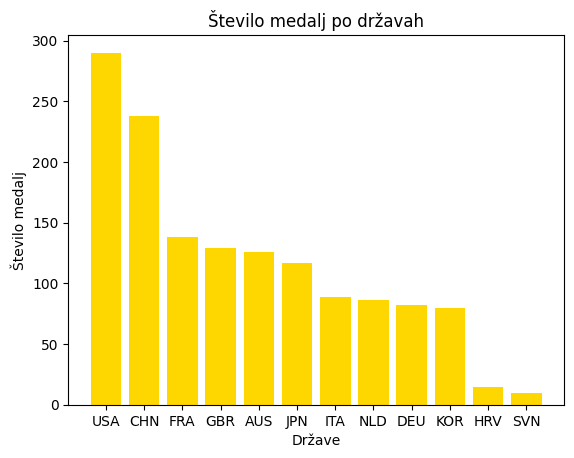

In [53]:
za_graf2 = skupno_število_medalj(alfa, 4, 2, 1)

skupno_število_medalj_novi_slovar2 = dict(list(za_graf2.items())[:10])
skupno_število_medalj_novi_slovar2['HRV'] = za_graf2.get('HRV')
skupno_število_medalj_novi_slovar2['SVN'] = za_graf2.get('SVN')

države = list(skupno_število_medalj_novi_slovar2.keys())
vrednosti = list(skupno_število_medalj_novi_slovar2.values())
plt.bar(države, vrednosti, color='gold')
plt.ylabel('Število medalj')
plt.xlabel('Države')
plt.title('Število medalj po državah')
plt.show()


Letos je največ medalj osvojila Kitajska plavalka Yufei Zhang, ki je osvojila 6 medalj. Športi z več disciplinami, kot naprimer plavanje, lahko državam prinesejo veliko več medalj, saj lahko en športnik tekmuje v kar 19-ih disciplinah (18 disciplin za vsak spol in mešana štafeta). V nogometu pa se podeljuje 3 medalje, vsaka država pa pošlje 18 tekmovalcev. Tako sem naredil nov graf, kjer so medalje tehtane.

{'USA': 22659, 'FRA': 19329, 'DEU': 12144, 'ESP': 10956, 'NLD': 10473, 'CHN': 10271, 'BRA': 7151, 'AUS': 6564, 'DNK': 5494, 'ITA': 5167, 'HRV': 2338, 'SVN': 137}


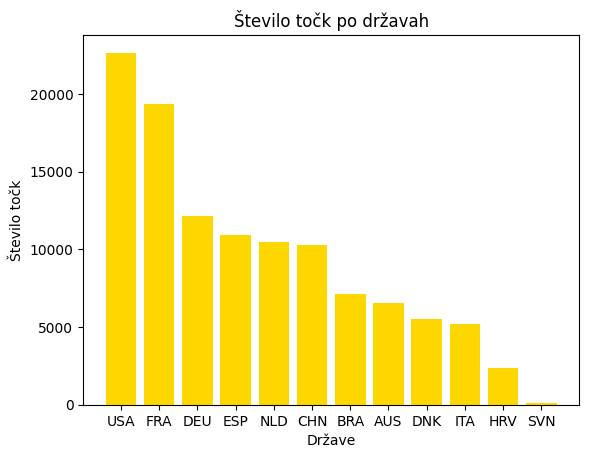

In [54]:
weightane_vrednosti_evetov
alfa = stevilo_medalj_drzave(atleti)
slovar1 = skupno_število_medalj(alfa, 4, 2, 1)

za_graf3 = število_točk_z_utežmi(atleti)
število_točk_z_utežmi_novi_slovar = dict(list(za_graf3.items())[:10])
število_točk_z_utežmi_novi_slovar['HRV'] = za_graf3.get('HRV')
število_točk_z_utežmi_novi_slovar['SVN'] = za_graf3.get('SVN')

print(število_točk_z_utežmi_novi_slovar)
države = list(število_točk_z_utežmi_novi_slovar.keys())
točke = list(število_točk_z_utežmi_novi_slovar.values())
plt.bar(države, točke, color='gold')
plt.ylabel('Število točk')
plt.xlabel('Države')
plt.title('Število točk po državah')
plt.show()

Kot prej sem v spodnjem grafu medalje utežil.

{'USA': 54583, 'FRA': 47518, 'NLD': 32497, 'CHN': 29341, 'ESP': 29263, 'DEU': 24335, 'ITA': 14038, 'DNK': 13793, 'AUS': 12625, 'BRA': 12178, 'HRV': 4755, 'SVN': 483}


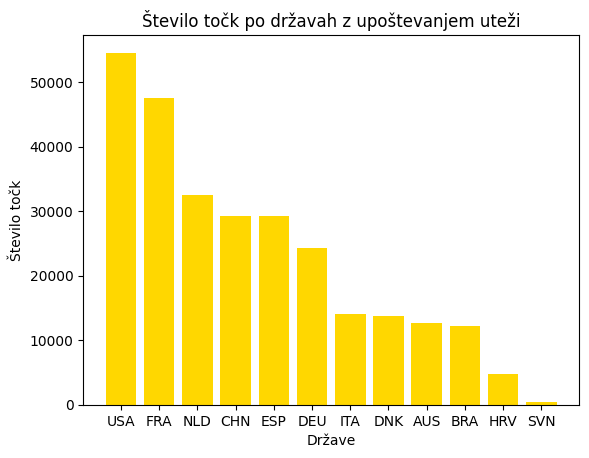

In [55]:
za_graf4 = število_točk_z_utežmi(atleti, 4, 2, 1)
število_točk_z_utežmi_novi_slovar2 = dict(list(za_graf4.items())[:10])
število_točk_z_utežmi_novi_slovar2['HRV'] = za_graf4.get('HRV')
število_točk_z_utežmi_novi_slovar2['SVN'] = za_graf4.get('SVN')
print(število_točk_z_utežmi_novi_slovar2)

države1 = list(število_točk_z_utežmi_novi_slovar2.keys())
točke1 = list(število_točk_z_utežmi_novi_slovar2.values())
plt.bar(države1, točke1, color='gold')
plt.ylabel('Število točk')
plt.xlabel('Države')
plt.title('Število točk po državah z upoštevanjem uteži')
plt.show()

Zanimalo me je tudi, kateremu kontinentu je šlo najbolje. Tukaj sem ekipo beguncev izpustil, saj so člani več držav iz različnih kontinentov.

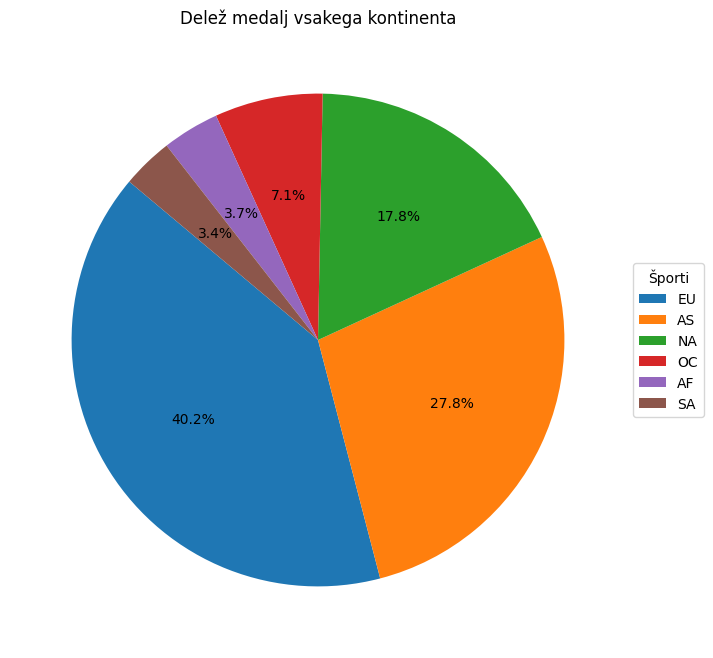

In [56]:
sortiran_slovar_kontinentov

labels = list(sortiran_slovar_kontinentov.keys())
sizes = list(sortiran_slovar_kontinentov.values())

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)
ax.legend(wedges, labels, title="Športi", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Delež medalj vsakega kontinenta')
plt.show()


Zanimalo me je tudi koliko medalj je imela vsaka država, v primeru da v skupinskih športih štejemo vsakemu svojo. Tako je vsak skupinski športnik dobil svojo, vsakemu plavalcu pa se je štelo toliko medalj kot jih je dobil.

{'USA': 318, 'FRA': 184, 'CHN': 168, 'GBR': 149, 'AUS': 121, 'NLD': 115, 'DEU': 111, 'ITA': 87, 'ESP': 83, 'JPN': 82, 'HRV': 20, 'SVN': 3}


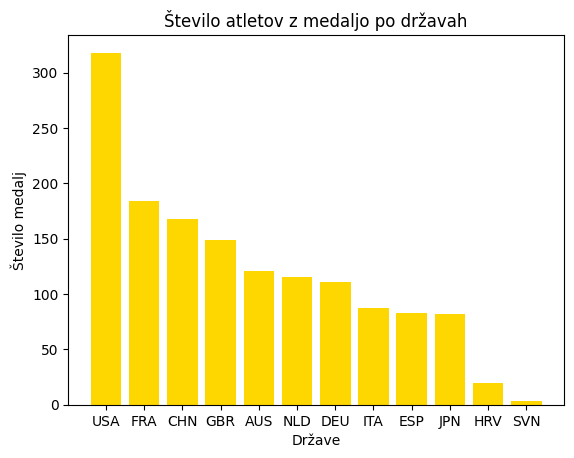

In [57]:
za_graf5 = skupno_število_medalj_vsakemu_svojo(atleti)
skupno_število_medalj_vsakemu_svojo_novi_slovar = dict(list(za_graf5.items())[:10])
skupno_število_medalj_vsakemu_svojo_novi_slovar['HRV'] = za_graf5.get('HRV')
skupno_število_medalj_vsakemu_svojo_novi_slovar['SVN'] = za_graf5.get('SVN')
print(skupno_število_medalj_vsakemu_svojo_novi_slovar)

države2 = list(skupno_število_medalj_vsakemu_svojo_novi_slovar.keys())
točke2 = list(skupno_število_medalj_vsakemu_svojo_novi_slovar.values())
plt.bar(države2, točke2, color='gold')
plt.ylabel('Število medalj')
plt.xlabel('Države')
plt.title('Število atletov z medaljo po državah')
plt.show()


Spodaj pa je graf, kjer se ne šteje števila medalj posameznega športnika, ampak nas zanima samo ali ima medaljo ali ne, ne pa koliko medalj ima.

{'USA': 255, 'FRA': 168, 'CHN': 131, 'GBR': 131, 'NLD': 107, 'DEU': 104, 'AUS': 93, 'ESP': 81, 'ITA': 80, 'JPN': 70, 'HRV': 20, 'SVN': 3}


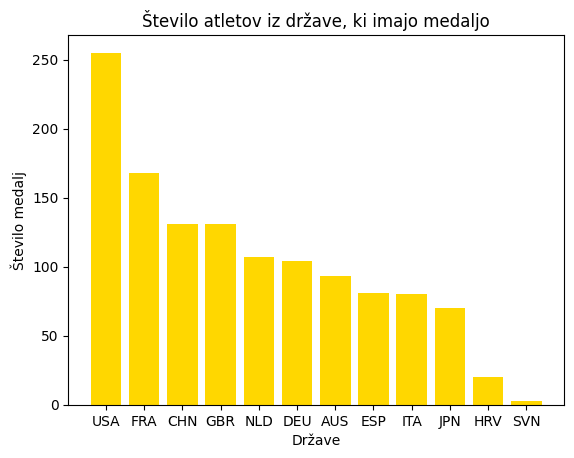

In [58]:
za_graf6 = št_prebivalcev_z_medaljo(atleti)
št_prebivalcev_z_medaljo_novi_slovar = dict(list(za_graf6.items())[:10])
št_prebivalcev_z_medaljo_novi_slovar['HRV'] = za_graf6.get('HRV')
št_prebivalcev_z_medaljo_novi_slovar['SVN'] = za_graf6.get('SVN')
print(št_prebivalcev_z_medaljo_novi_slovar)

države3 = list(št_prebivalcev_z_medaljo_novi_slovar.keys())
točke3 = list(št_prebivalcev_z_medaljo_novi_slovar.values())
plt.bar(države3, točke3, color='gold')
plt.ylabel('Število medalj')
plt.xlabel('Države')
plt.title('Število atletov iz države, ki imajo medaljo')
plt.show()




Na vprašanje koliko športnikov iz vsake države je prišlo na olimpijske igre pa sem odgovor dobil na redditu in ga spremenil v tabelo.

{'USA': 592, 'FRA': 573, 'AUS': 461, 'DEU': 428, 'JPN': 403, 'ITA': 402, 'CHN': 388, 'ESP': 383, 'GBR': 327, 'CAN': 315, 'SVN': 90, 'HRV': 73}


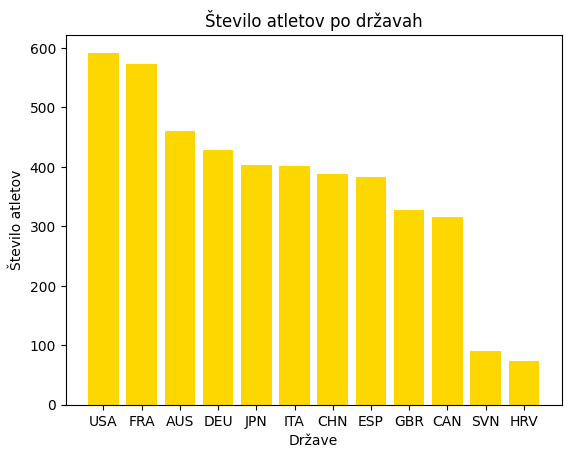

In [59]:
število_atletov_po_vrsti
število_atletov_po_vrsti_novi_slovar = dict(list(število_atletov_po_vrsti.items())[:10])
število_atletov_po_vrsti_novi_slovar['SVN'] = število_atletov_po_vrsti.get('SVN')
število_atletov_po_vrsti_novi_slovar['HRV'] = število_atletov_po_vrsti.get('HRV')
print(število_atletov_po_vrsti_novi_slovar)

države4 = list(število_atletov_po_vrsti_novi_slovar.keys())
točke4 = list(število_atletov_po_vrsti_novi_slovar.values())
plt.bar(države4, točke4, color='gold')
plt.ylabel('Število atletov')
plt.xlabel('Države')
plt.title('Število atletov po državah')
plt.show()


Spodaj sta grafa števila prebivalcev na enega olimpijskega športnika. Prvi je graf vseh držav, ki so sodelovale, drugi pa je graf držav z več kot pol milijona prebivalcev, saj imajo majhne države prednost. Najbrž graf izgleda pristranski, ampak so rezultati na prvem mestu enaki, če vključimo države nad 200.000 prebivalcev in vse do populacije Slovenije. Seveda spet izpustimo ekipo beguncev, zaradi večjega števila držav.

{'TUV': 5823, 'PLW': 6003, 'MCO': 6494, 'SMR': 6772, 'VGB': 7508, 'BMU': 7990, 'WSM': 8212, 'COK': 8730, 'NRU': 12581, 'MHL': 14698, 'SVN': 23199, 'HRV': 55719}


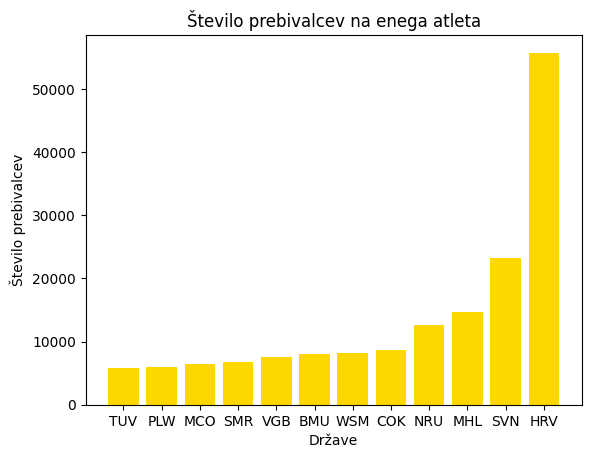

In [60]:
za_graf7 = koliko_prebivalcev_na_atleta(število_atletov_iz_vsake_države)
koliko_prebivalcev_na_atleta_novi_slovar = dict(list(za_graf7.items())[:10])
koliko_prebivalcev_na_atleta_novi_slovar['SVN'] = za_graf7.get('SVN')
koliko_prebivalcev_na_atleta_novi_slovar['HRV'] = za_graf7.get('HRV')

print(koliko_prebivalcev_na_atleta_novi_slovar)

države5 = list(koliko_prebivalcev_na_atleta_novi_slovar.keys())
točke5 = list(koliko_prebivalcev_na_atleta_novi_slovar.values())
plt.bar(države5, točke5, color='gold')
plt.ylabel('Število prebivalcev')
plt.xlabel('Države')
plt.title('Število prebivalcev na enega atleta')
plt.show()


{'SVN': 23199, 'NZL': 25215, 'FJI': 26968, 'MNE': 32744, 'IRL': 36876, 'LUX': 44278, 'DNK': 46924, 'NOR': 49980, 'JAM': 50832, 'LTU': 54644, 'HRV': 55719}


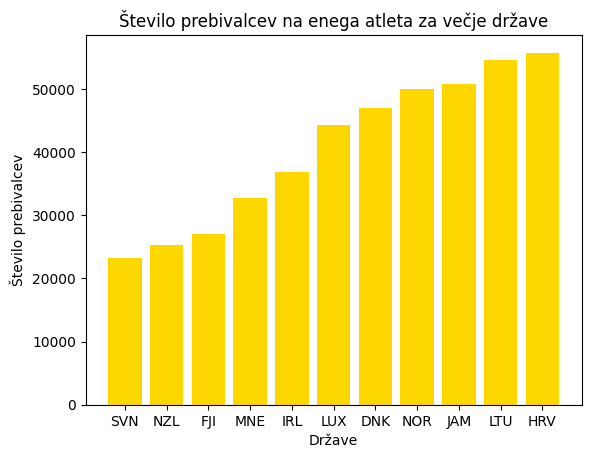

In [61]:
za_graf8 = koliko_prebivalcev_na_atleta(število_atletov_iz_vsake_države, 500000)
koliko_prebivalcev_na_atleta_novi_slovar2 = dict(list(za_graf8.items())[:10])
koliko_prebivalcev_na_atleta_novi_slovar2['SVN'] = za_graf8.get('SVN')
koliko_prebivalcev_na_atleta_novi_slovar2['HRV'] = za_graf8.get('HRV')
print(koliko_prebivalcev_na_atleta_novi_slovar2)

države6 = list(koliko_prebivalcev_na_atleta_novi_slovar2.keys())
točke6 = list(koliko_prebivalcev_na_atleta_novi_slovar2.values())
plt.bar(države6, točke6, color='gold')
plt.ylabel('Število prebivalcev')
plt.xlabel('Države')
plt.title('Število prebivalcev na enega atleta za večje države')
plt.show()


Ker pa število atletov ne pomeni veliko, če ne prinesejo domov medalje, je spodaj še graf prebivalcev na enega medalista.

{'GRD': 56002, 'FJI': 63568, 'DMA': 71808, 'NZL': 114349, 'DNK': 141916, 'NLD': 161989, 'LCA': 182790, 'HRV': 203375, 'NOR': 232517, 'SRB': 239482, 'SVN': 695982}


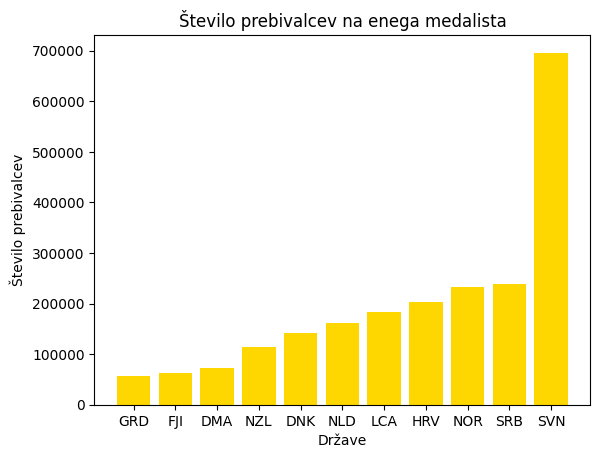

In [62]:
gama = št_prebivalcev_z_medaljo(atleti)
za_graf9 = prebivalcev_na_medaljo(gama)
prebivalcev_na_medaljo_novi_slovar = dict(list(za_graf9.items())[:10])
prebivalcev_na_medaljo_novi_slovar['SVN'] = za_graf9.get('SVN')
prebivalcev_na_medaljo_novi_slovar['HRV'] = za_graf9.get('HRV')
print(prebivalcev_na_medaljo_novi_slovar)

države7 = list(prebivalcev_na_medaljo_novi_slovar.keys())
točke7 = list(prebivalcev_na_medaljo_novi_slovar.values())
plt.bar(države7, točke7, color='gold')
plt.ylabel('Število prebivalcev')
plt.xlabel('Države')
plt.title('Število prebivalcev na enega medalista')
plt.show()




In pa še graf za države z več kot pol milijona prebivalcev.

{'FJI': 63568, 'NZL': 114349, 'DNK': 141916, 'NLD': 161989, 'HRV': 203375, 'NOR': 232517, 'SRB': 239482, 'AUS': 272734, 'HUN': 390798, 'LTU': 398121, 'SVN': 695982}


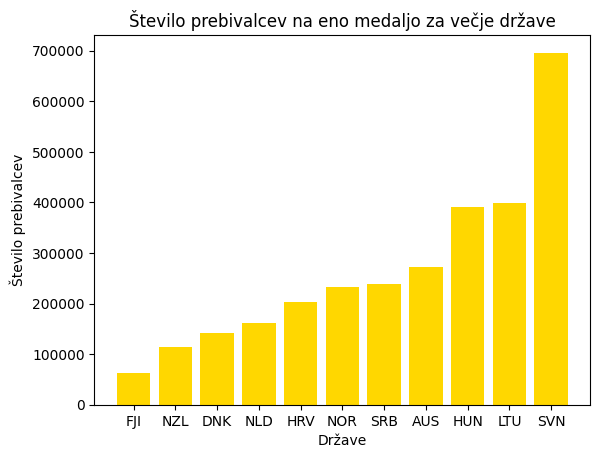

In [63]:
gama = št_prebivalcev_z_medaljo(atleti)
za_graf10 = prebivalcev_na_medaljo(gama, 500000)
prebivalcev_na_medaljo_novi_slovar2 = dict(list(za_graf10.items())[:10])
prebivalcev_na_medaljo_novi_slovar2['SVN'] = za_graf10.get('SVN')
prebivalcev_na_medaljo_novi_slovar2['HRV'] = za_graf10.get('HRV')
print(prebivalcev_na_medaljo_novi_slovar2)

države8 = list(prebivalcev_na_medaljo_novi_slovar2.keys())
točke8 = list(prebivalcev_na_medaljo_novi_slovar2.values())
plt.bar(države8, točke8, color='gold')
plt.ylabel('Število prebivalcev')
plt.xlabel('Države')
plt.title('Število prebivalcev na eno medaljo za večje države')
plt.show()


To da športnik pride na olimpijske igre in se prebije skozi kvalifikacije je seveda velik uspeh. Kako pa jim gre takrat, ko je to najbolj pomembno? Prvi graf je procent števila medalistov glede na vse poslane športnike, drugi pa je procent medalj glede na poslane športnike. 

{'PRK': 43.75, 'USA': 43.07, 'FJI': 42.42, 'GBR': 40.06, 'NLD': 39.19, 'KGZ': 37.5, 'BWA': 36.36, 'MAR': 33.9, 'CHN': 33.76, 'GRD': 33.33, 'HRV': 27.4, 'SVN': 3.33}


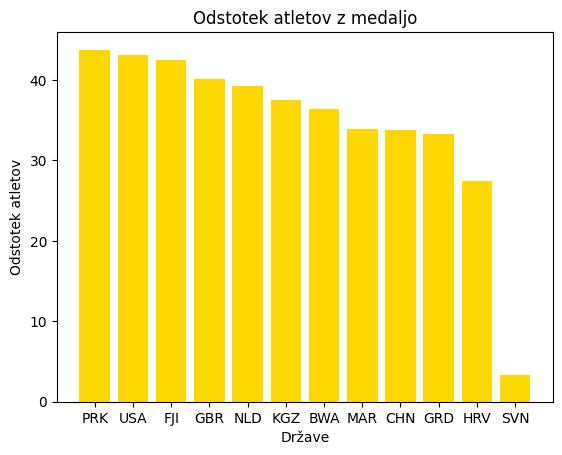

In [64]:
prvi = št_prebivalcev_z_medaljo(atleti)
drugi = število_atletov_iz_vsake_države

za_graf11 = procent_atletov_z_medaljo(prvi, drugi)
procent_atletov_z_medaljo_novi_slovar = dict(list(za_graf11.items())[:10])
procent_atletov_z_medaljo_novi_slovar['HRV'] = za_graf11.get('HRV')
procent_atletov_z_medaljo_novi_slovar['SVN'] = za_graf11.get('SVN')
print(procent_atletov_z_medaljo_novi_slovar)

države9 = list(procent_atletov_z_medaljo_novi_slovar.keys())
točke9 = list(procent_atletov_z_medaljo_novi_slovar.values())
plt.bar(države9, točke9, color='gold')
plt.ylabel('Odstotek atletov')
plt.xlabel('Države')
plt.title('Odstotek atletov z medaljo')
plt.show()


{'USA': 53.72, 'PRK': 50.0, 'LCA': 50.0, 'GBR': 45.57, 'BWA': 45.45, 'CHN': 43.3, 'FJI': 42.42, 'NLD': 42.12, 'KOR': 41.13, 'KGZ': 37.5, 'HRV': 27.4, 'SVN': 3.33}


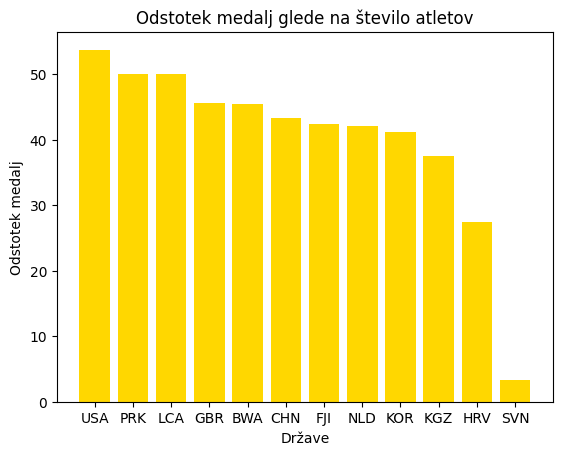

In [65]:
prvi = skupno_število_medalj_vsakemu_svojo(atleti)
drugi = število_atletov_iz_vsake_države
za_graf12 = procent_atletov_z_medaljo(prvi, drugi)
procent_atletov_z_medaljo_novi_slovar2 = dict(list(za_graf12.items())[:10])
procent_atletov_z_medaljo_novi_slovar2['HRV'] = za_graf12.get('HRV')
procent_atletov_z_medaljo_novi_slovar2['SVN'] = za_graf12.get('SVN')
print(procent_atletov_z_medaljo_novi_slovar2)

države10 = list(procent_atletov_z_medaljo_novi_slovar2.keys())
točke10 = list(procent_atletov_z_medaljo_novi_slovar2.values())
plt.bar(države10, točke10, color='gold')
plt.ylabel('Odstotek medalj')
plt.xlabel('Države')
plt.title('Odstotek medalj glede na število atletov')
plt.show()


Kako nam je torej šlo? Smo 'pred Hrvati'? Katera država je najbolj 'olimpijska'?


Nasploh je Slovenija pokazala, da je zelo športna država in ti podatki na žalost ne vključujejo dveh četrtih mest naših odbojkarjev in rokometašev, ter sodniških odločitev proti Petru Kauzerju in Benjaminu Savšku. Glede na število športnikov na prebivalca smo v svetovnem vrhu, medtem ko smo v odstotkih glede na poslane olimpijce tretji od zadaj. Letošnje Poletne olimpijske igre v Parizu za Slovenijo nažalost niso bile tako zelo uspešne. Na drugi strani pa so Hrvati poslali manj atletov in dobili več medalj. V povprečju smo torej boljši športniki, nam je pa zmanjkalo malo sreče, tako da bi rekel, da so Hrvati pred nami.

Kar se tiče uspeha ostalih držav na olimpijskih igrah me je presenetil Fiji. Njihova medalja je sicer iz rugbija 7, v katerem so zgodovinsko dobri, vendar so pridobili na lestvicah, kjer se štejejo posamezni športniki, saj ima rugbi 7 vse skupaj 14 igralcev. Presenetila me je tudi Severna Koreja, ki je sicer poslala le 16 atletov, dobila pa kar 8 medalj vse skupaj. Zmagovalke letošnjih olimpijskih iger so zagotovo Združene države Amerike, z največ medaljami, največjim izkupičkom točk (tudi če utežimo discipline) in najvišjim deležem medalj na poslanega atleta. Vse to je delno tudi odraz velikosti ZDA in nekako po pričakovanjih gledalcev. Moja osebna zmagovalka pa je Nizozemska. Svoje mesto ima v vseh grafih, ki vključujejo medalje in manjka le v grafih, kjer je pomembno število poslanih športnikov. Z majhnim številom poslanih športnikov so osvojili veliko število medalj, kar je pravzaprav edina pomembna statistika na olimpijskih igrah.